
Autism Screening Prediction using Neural Networks

Autism is a developmental disorder that affects social interaction, communication, and behavior. Early detection is important, but there's no definitive clinical method to diagnose Autism through physical tests alone.

In this project, I explore whether we can use machine learning to help identify individuals who may be on the autism spectrum based on screening data.

I start by preprocessing and cleaning the dataset, handling missing values, normalizing numeric features, and one-hot encoding categorical variables. I then visualize patterns in the data, including class distribution, ethnicity, gender, and country-level breakdowns.
 
After preparing the data, I build and train a simple neural network using TensorFlow/Keras to predict the likelihood of Autism based on survey responses and demographic features. Finally, I evaluate the model using accuracy, classification report, and performance curves.

 This notebook walks through the entire pipeline: from raw data to prediction, and serves as a baseline for further experimentation or model improvement.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
pd.options.plotting.backend = "plotly"



In [2]:
df = pd.read_csv("autism_screening.csv")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
df.shape

(704, 21)

### Datatypes of each feature:

In [ ]:
pd.DataFrame(df.dtypes,columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


### Descriptive statistical measures of the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


### Check Null values:

In [6]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


### Replace null value in age with mean

In [7]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [8]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


### Check unique values:

In [9]:
for col in df.select_dtypes('O').columns:
   
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

Column name: gender

Unique values:
['f' 'm']


Column name: ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


Column name: jundice

Unique values:
['no' 'yes']


Column name: austim

Unique values:
['no' 'yes']


Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'


**ethnicity and relation contains some invalid values**

### Replacing invalid value in ethnicity

In [10]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')

In ethnicity feature, "Others" and "others" are same thing but it is considered different because one is in small case and other is in letter case. So fixing this.

In [11]:
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

In [12]:
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

### Replacing invalid value in relation

**Replacing ? in relation with mode of relation**

In [13]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [14]:
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

### Autism disorder count

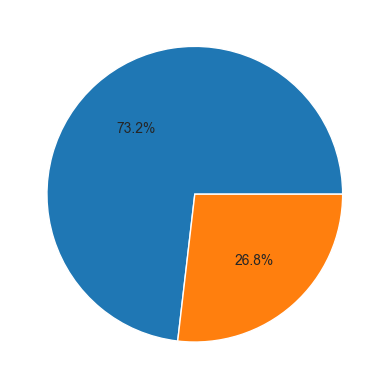

In [15]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


### Autism patient country wise

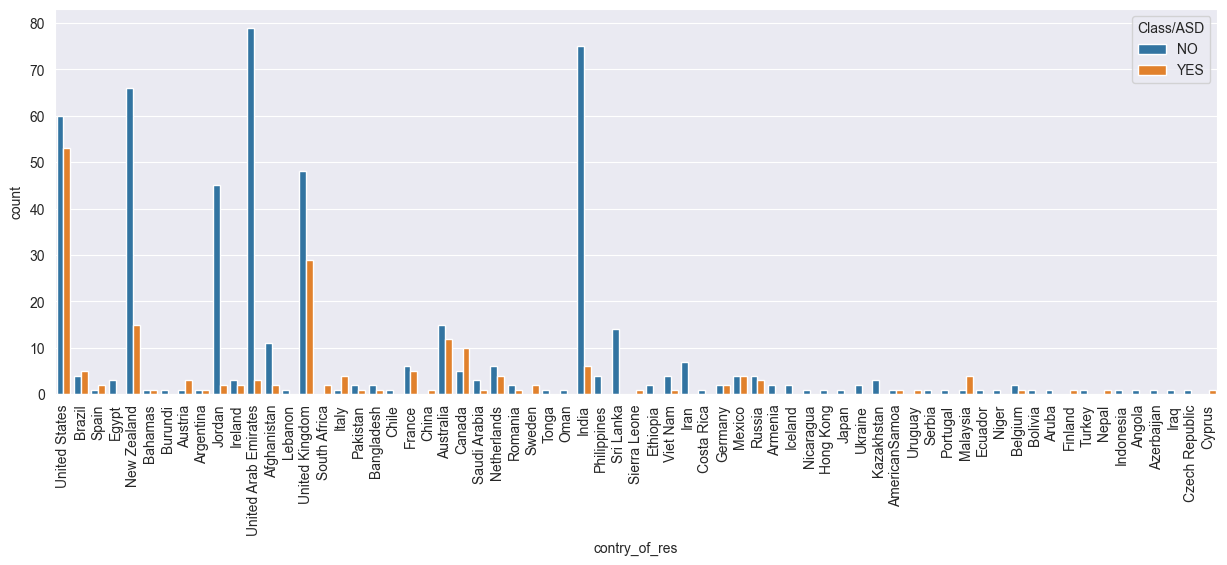

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


### Normal distribution of the age values after log transformations

In [19]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


/var/folders/d7/69b_q14n7f91jv0xw10s2_c00000gn/T/ipykernel_12857/3438169644.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




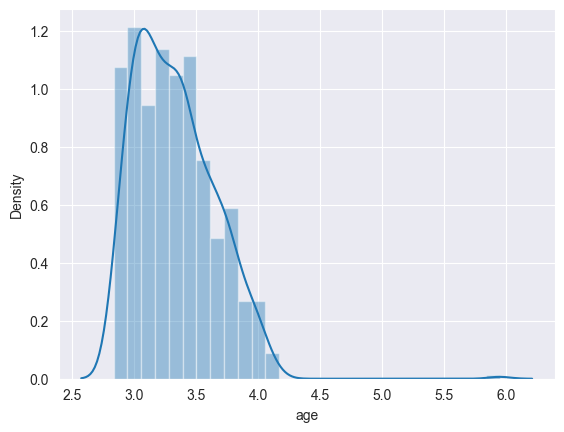

In [20]:
sns.distplot(df['age'])
plt.show()


### Ethnicity count 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White-European'),
  Text(1, 0, 'Latino'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Middle Eastern '),
  Text(6, 0, 'Pasifika'),
  Text(7, 0, 'South Asian'),
  Text(8, 0, 'Hispanic'),
  Text(9, 0, 'Turkish')])

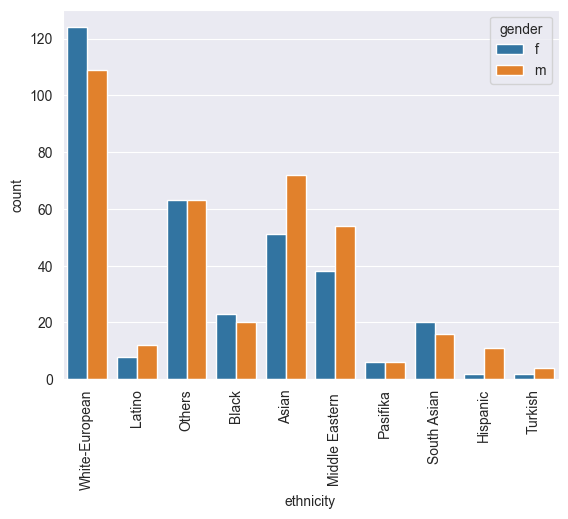

In [21]:
sns.countplot(x='ethnicity',hue='gender',data=df)
plt.xticks(rotation=90)

**Dropping columns**

In [22]:
df.drop(['age_desc'], axis = 1, inplace = True)

**Let’s split the data into training and validation data. **

In [23]:
X = df.drop("Class/ASD", axis = 1)    # select all other feature except "Class/ASD" for training
Y = df['Class/ASD']

### OneHotEncoding of Categorical features

In [24]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

## Neural Network Model:

In [37]:
# Written by Ovi, 2025-05-17
# Build and train a simple neural network with proper data type and shape handling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
import numpy as np
from tensorflow import keras

tf.random.set_seed(3)

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X.shape, X_train.shape, X_test.shape, Y_train.shape)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Reshape to fit input_shape=(102,1)
X_train_std = X_train_std.reshape(-1, 102, 1).astype('float32')
X_test_std = X_test_std.reshape(-1, 102, 1).astype('float32')

# Ensure labels are NumPy arrays (but do NOT apply to_categorical again)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# If labels are integers (0/1), convert to one-hot only once
if len(Y_train.shape) == 1:
    from tensorflow.keras.utils import to_categorical
    Y_train = to_categorical(Y_train, num_classes=2)
    Y_test = to_categorical(Y_test, num_classes=2)

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(102, 1)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  # Use softmax for categorical classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_std, Y_train, 
                    epochs=20, 
                    batch_size=10, 
                    validation_data=(X_test_std, Y_test))

(704, 102) (528, 102) (176, 102) (528, 2)
Epoch 1/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7614 - val_loss: 0.4943 - val_accuracy: 0.8523
Epoch 2/20
53/53 [==============================] - 0s 635us/step - loss: 0.3505 - accuracy: 0.8807 - val_loss: 0.3549 - val_accuracy: 0.9034
Epoch 3/20
53/53 [==============================] - 0s 623us/step - loss: 0.2481 - accuracy: 0.9280 - val_loss: 0.2740 - val_accuracy: 0.9034
Epoch 4/20
53/53 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9451 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 5/20
53/53 [==============================] - 0s 621us/step - loss: 0.1446 - accuracy: 0.9602 - val_loss: 0.1799 - val_accuracy: 0.9205
Epoch 6/20
53/53 [==============================] - 0s 598us/step - loss: 0.1148 - accuracy: 0.9754 - val_loss: 0.1553 - val_accuracy: 0.9261
Epoch 7/20
53/53 [==============================] - 0s 603us/step - loss: 0.0938 - accuracy: 0.9830 - val_loss

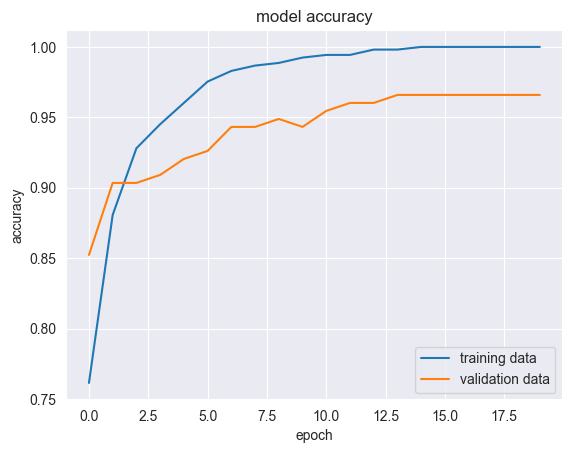

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

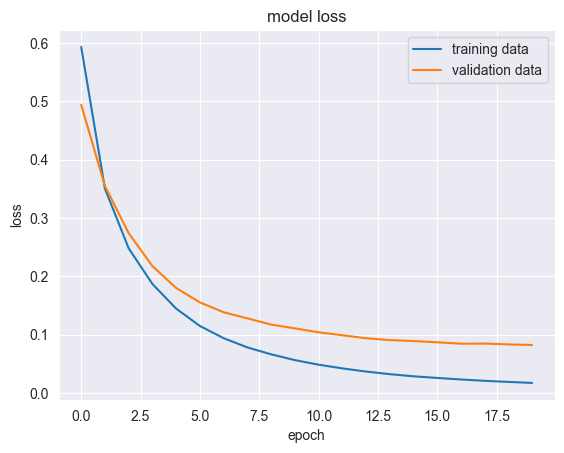

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

###  Model Evaluation

In [41]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

6/6 [==============================] - 0s 899us/step - loss: 0.0821 - accuracy: 0.9659
0.9659090638160706


### Classification Report

In [45]:
from sklearn.metrics import accuracy_score, classification_report

# Convert one-hot labels back to integers
true_labels = np.argmax(Y_test, axis=1)

# Evaluate predictions
print(accuracy_score(true_labels, prediction))
print(classification_report(true_labels, prediction))

0.9659090909090909
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       129
           1       0.92      0.96      0.94        47

    accuracy                           0.97       176
   macro avg       0.95      0.96      0.96       176
weighted avg       0.97      0.97      0.97       176



In [48]:
model.save("autism_prediction_model.h5")

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [49]:
import joblib
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']